In [1]:
# NLTK (Natural Language Toolkit) is a Python package that is used for Natural Language Processing (NLP)
!pip install nltk

import nltk

Defaulting to user installation because normal site-packages is not writeable
Looking in links: /usr/share/pip-wheels


In [2]:
import pandas as pd

In [3]:
# import excel file with data on financial news media postings - file has article titles and sentiment label for the content of the post

df = pd.read_csv('financial_news.csv')

In [4]:
df.head()

,Text,Label
0,Amazon to create 500 new jobs in Mississippi a...,positive
1,"GE's stock rises 1% premarket, set to trade ab...",positive
2,"CN Rail Strike Begins, Threatening Canada Oil,...",negative
3,"Hong Kong Airlines to cut 400 jobs, ask employ...",negative
4,3 Top-Performing Mutual Funds to Consider for ...,neutral


In [5]:
df.shape

(9549, 2)

In [6]:
# Count the number of "neutral", "positive", and "negative" samples in the "Label" column
df['Label'].value_counts()

Label
neutral     6179
positive    1927
negative    1443
Name: count, dtype: int64

In [7]:
# iloc[] is used for integer-based Pandas DataFrame indexing
df.iloc[0]

Text     Amazon to create 500 new jobs in Mississippi a...
Label                                             positive
Name: 0, dtype: object

In [8]:
# Print 5 samples from the Pandas DataFrame "df" and Perform a sanity check
for i in range(5):
    print('Data: {}'.format(df.iloc[i]['Text']))
    print('Label: {}'.format(df.iloc[i]['Label']))
    print('\n')

Data: Amazon to create 500 new jobs in Mississippi as it builds new fulfillment center
Label: positive


Data: GE's stock rises 1% premarket, set to trade above $13 for 1st time in regular-session hours since October 2018
Label: positive


Data: CN Rail Strike Begins, Threatening Canada Oil, Grain Shipments
Label: negative


Data: Hong Kong Airlines to cut 400 jobs, ask employees to take unpaid leave: SCMP
Label: negative


Data: 3 Top-Performing Mutual Funds to Consider for Your Retirement Portfolio- February 07, 2020
Label: neutral




In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9549 entries, 0 to 9548
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Text    9549 non-null   object
 1   Label   9549 non-null   object
dtypes: object(2)
memory usage: 149.3+ KB


In [10]:
#display the last ten samples of the df
df.tail(10)

,Text,Label
9539,Japan Recession Risks Prompt Forecasts of 2020...,negative
9540,Novo Nordisk beats analysts estimates in Q2 2022,positive
9541,Apple's iPhone sales accounted for 47.3 % of t...,neutral
9542,Alibaba lays off nearly 10000 employees to cut...,positive
9543,Here's what happened to the stock market on Tu...,neutral
9544,Stock Market Update: Boeing turns positive,positive
9545,33 genius travel hacks to upgrade your holiday...,neutral
9546,Hong Kong stocks increased 4% as China relaxes...,positive
9547,Novo Nordisk stock increased by 2% in today's ...,positive
9548,Amazon stock lost half its value this year as ...,negative


In [11]:

len(df)

9549

In [12]:
#perform a sanity check by displaying the last 10 rows with the corresponding label
for i in range(len(df)-10, len(df), 1):
    print('Data: {}'.format(df.iloc[i]['Text']))
    print('Label: {}'.format(df.iloc[i]['Label']))     
    print('\n')

Data: Japan Recession Risks Prompt Forecasts of 2020 Contraction
Label: negative


Data: Novo Nordisk beats analysts estimates in Q2 2022
Label: positive


Data: Apple's iPhone sales accounted for 47.3 % of the company's overall revenue in Q1 2022
Label: neutral


Data: Alibaba lays off nearly 10000 employees to cut expenses
Label: positive


Data: Here's what happened to the stock market on Tuesday
Label: neutral


Data: Stock Market Update: Boeing turns positive
Label: positive


Data: 33 genius travel hacks to upgrade your holiday trips https://t.co/ZVckjmpdVE
Label: neutral


Data: Hong Kong stocks increased 4% as China relaxes virus rules
Label: positive


Data: Novo Nordisk stock increased by 2% in today's trading session
Label: positive


Data: Amazon stock lost half its value this year as tech stocks got crushed and recession fears grew
Label: negative




In [13]:
# import the regular expressions (re) module in Python 
# A regular expression is a sequence of characters that specifies a match pattern in text
# Regular expressions are commonly used for search operations on Strings

import re

In [14]:
# download common stop words present in the English language from the nltk library
# Stop words are a set of commonly used words such as “is” and “and”

nltk.download('stopwords')
from nltk.corpus import stopwords
set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/7c727535-83e9-4459-8192-
[nltk_data]     2080a24a7302/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [15]:
# define a function that performs data cleaning by removing stop words and non-alphanumeric characters  
# Note that alphanumeric characters (letters and digits) in English includes letters from A to Z and Arabic numerals 0 to 9

# The function takes in a string of text, removes non-alphanumeric characters, converts text to lower case, 
# removes stop words and returns cleaned text in a String format

def clean_text(text):

    # remove non-alphanumeric charachters 
    # The re.sub() returns a string where all matching occurrences of the given pattern are replaced by the provided string
    # This is a regular expression to remove any non-alphanumeric from a string variable called text
    # a-zA-Z0-9 means alphanumeric characters (letters and digits) 
    # a-z and A-Z specify all letters and 0-9 specifies all digits
    # ^ means negated character set
    # Note that "r" creates a raw string that do not process escape sequences (\n)

    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)

    # Convert text to lower case
    text = text.lower()

    # Remove stop words 
    stop_words = set(stopwords.words('english'))
    words = text.split()
    words = [word for word in words if word not in stop_words]

    # Join words back into a single string
    cleaned_text = ' '.join(words)

    return cleaned_text
    

In [16]:
#test out python function
clean_text('WELCOME to this practical skills module!!')

'welcome practical skills module'

In [17]:
#apply function to the entire pandas df
df['Cleaned Text'] = df['Text'].apply(clean_text)

In [18]:
df

,Text,Label,Cleaned Text
0,Amazon to create 500 new jobs in Mississippi a...,positive,amazon create 500 new jobs mississippi builds ...
1,"GE's stock rises 1% premarket, set to trade ab...",positive,ges stock rises 1 premarket set trade 13 1st t...
2,"CN Rail Strike Begins, Threatening Canada Oil,...",negative,cn rail strike begins threatening canada oil g...
3,"Hong Kong Airlines to cut 400 jobs, ask employ...",negative,hong kong airlines cut 400 jobs ask employees ...
4,3 Top-Performing Mutual Funds to Consider for ...,neutral,3 topperforming mutual funds consider retireme...
...,...,...,...
9544,Stock Market Update: Boeing turns positive,positive,stock market update boeing turns positive
9545,33 genius travel hacks to upgrade your holiday...,neutral,33 genius travel hacks upgrade holiday trips h...
9546,Hong Kong stocks increased 4% as China relaxes...,positive,hong kong stocks increased 4 china relaxes vir...
9547,Novo Nordisk stock increased by 2% in today's ...,positive,novo nordisk stock increased 2 todays trading ...


In [19]:
# define a function that receives a string of text and generates word cloud visualization 
# The Python Function also removes custom stop words such as politics-related words before generating the word cloud

# Let's install and import WordCloud library
!pip install wordcloud
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt


def generate_word_cloud(text):
    
    # Add custom stop words
    custom_stopwords = {"http", "china", "us", "united states", "political", "politics","stock","stocks", "trump"}

    # Update the default stop words included in the WordCloud library with our custom stop words
    stopwords = set(STOPWORDS)
    stopwords.update(custom_stopwords)

    # Generate the WordCloud object
    wordcloud = WordCloud(width = 1600, height = 800, stopwords = stopwords, min_font_size = 10).generate(text)

    # Display the WordCloud 
    plt.figure(figsize = (12, 12))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

Defaulting to user installation because normal site-packages is not writeable
Looking in links: /usr/share/pip-wheels


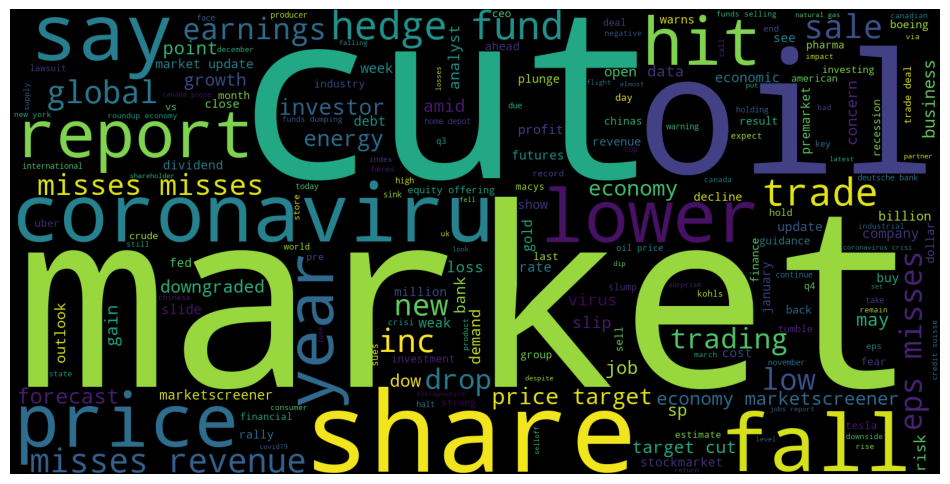

In [20]:
# Generate word cloud visualization for text with negative sentiment
generate_word_cloud(" ".join(df[df['Label'] == 'negative']['Cleaned Text']))

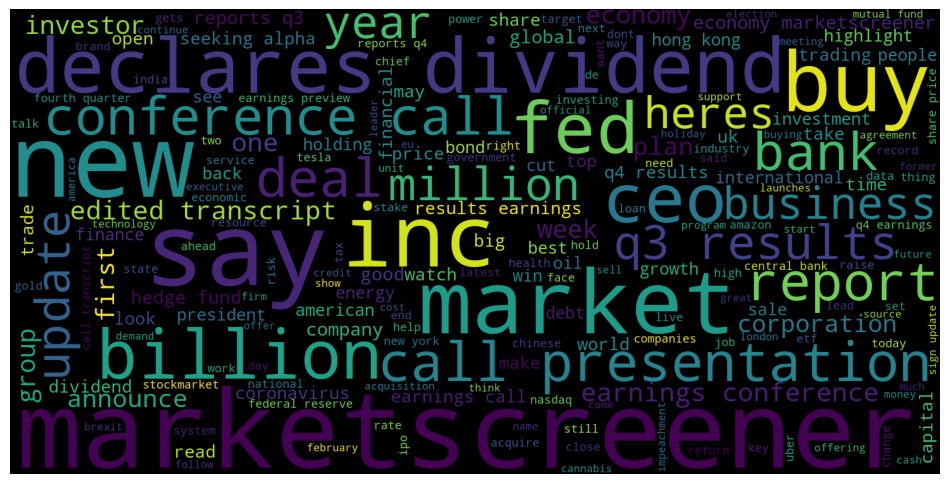

In [21]:
# Generate word cloud visualization for text with neutral sentiment
generate_word_cloud(" ".join(df[df['Label'] == 'neutral']['Cleaned Text']))

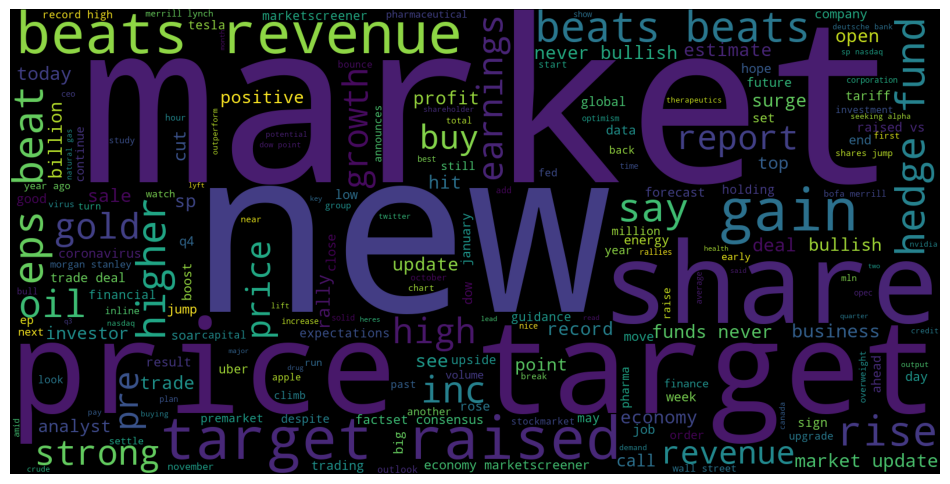

In [22]:
generate_word_cloud(" ".join(df[df['Label'] == 'positive']['Cleaned Text']))

In [23]:
# perform text data encoding by converting text into numbers to be used for model training
# FinBERT is a pre-trained NLP model to analyze sentiment of financial text
# Hugging Face is a popular community and data science platform that offers tools to build, train and deploy AI/ML models
# Prosus is a global consumer internet group and one of the largest technology investors in the world
# Source: https://huggingface.co/ProsusAI/finbert

!pip install transformers

from transformers import AutoTokenizer 
tokenizer = AutoTokenizer.from_pretrained("ProsusAI/finbert")

Defaulting to user installation because normal site-packages is not writeable
Looking in links: /usr/share/pip-wheels


In [24]:
news_1 = "Hong Kong stocks oncreased 4% as Chinas relaxes virus rules"
news_2  = "Novo Nordisk stock increased by 2% in today's trading session"
news_3  = "Amazon stock lost half its value this year as tech stocks got crushed and recession fears grew"

In [25]:
# View an encoded version of a sample dataset #1
encoded_news_1 = tokenizer.encode(news_1)
print(encoded_news_1)

[101, 4291, 4290, 15768, 2006, 16748, 11022, 2094, 1018, 1003, 2004, 2859, 2015, 9483, 2229, 7865, 3513, 102]


In [26]:
encoded_news_2 = tokenizer.encode(news_2)
print(encoded_news_2)

[101, 24576, 13926, 20573, 4518, 3445, 2011, 1016, 1003, 1999, 2651, 1005, 1055, 6202, 5219, 102]


In [27]:
encoded_news_3 = tokenizer.encode(news_3)
print(encoded_news_3)

[101, 9733, 4518, 2439, 2431, 2049, 3643, 2023, 2095, 2004, 6627, 15768, 2288, 10560, 1998, 19396, 10069, 3473, 102]


In [28]:
encoded_1 = tokenizer.encode("JPMorgan Sees 70% Upside for These 2 Auto Stocks in 2023")
print(encoded_1)

[101, 16545, 5302, 16998, 5927, 3963, 1003, 14961, 2005, 2122, 1016, 8285, 15768, 1999, 16798, 2509, 102]


In [29]:
encoded_2 = tokenizer.encode("JPMorgan, Goldman Say Stocks Recovery Won’t Be Easy in 2023")
print(encoded_2)

[101, 16545, 5302, 16998, 1010, 17765, 2360, 15768, 7233, 2180, 1521, 1056, 2022, 3733, 1999, 16798, 2509, 102]


In [30]:
# View an encoded version of sample dataset #1 and obtain its length 
print(encoded_news_1)
len(encoded_news_1)

[101, 4291, 4290, 15768, 2006, 16748, 11022, 2094, 1018, 1003, 2004, 2859, 2015, 9483, 2229, 7865, 3513, 102]


18

In [31]:
print(encoded_news_2)
len(encoded_news_2)

[101, 24576, 13926, 20573, 4518, 3445, 2011, 1016, 1003, 1999, 2651, 1005, 1055, 6202, 5219, 102]


16

In [32]:
print(encoded_news_3)
len(encoded_news_3)

[101, 9733, 4518, 2439, 2431, 2049, 3643, 2023, 2095, 2004, 6627, 15768, 2288, 10560, 1998, 19396, 10069, 3473, 102]


19

In [33]:
# Data has to be converted to tensors so we can perform padding 
# PyTorch is a widely used framework developed my META that offers an easy-to-use interface for building, training and testing ANNs 
# Tensors are the main data structure used in PyTorch to represent multi-dimensional arrays, such as images, text, or audio 
# Tensors can be created from Numpy arrays or from Python Lists

# install PyTorch
!pip install torch==1.8.1+cpu torchvision==0.9.1+cpu torchaudio===0.8.1 -f https://download.pytorch.org/whl/torch_stable.html

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
Defaulting to user installation because normal site-packages is not writeable
Looking in links: /usr/share/pip-wheels, https://download.pytorch.org/whl/torch_stable.html
ERROR: Could not find a version that satisfies the requirement torch==1.8.1+cpu (from versions: 1.11.0, 1.11.0+cpu, 1.11.0+cu102, 1.11.0+cu113, 1.11.0+cu115, 1.11.0+rocm4.3.1, 1.11.0+rocm4.5.2, 1.12.0, 1.12.0+cpu, 1.12.0+cu102, 1.12.0+cu113, 1.12.0+cu116, 1.12.0+rocm5.0, 1.12.0+rocm5.1.1, 1.12.1, 1.12.1+cpu, 1.12.1+cu102, 1.12.1+cu113, 1.12.1+cu116, 1.12.1+rocm5.0, 1.12.1+rocm5.1.1, 1.13.0, 1.13.0+cpu, 1.13.0+cu116, 1.13.0+cu117, 1.13.0+cu117.with.pypi.cudnn, 1.13.0+rocm5.1.1, 1.13.0+rocm5.2, 1.13.1, 

In [34]:
# qimport torch and perform sequence padding
import torch
from torch.nn.utils.rnn import pad_sequence
padded_sequence = pad_sequence([torch.tensor(encoded_news_1), torch.tensor(encoded_news_2), torch.tensor(encoded_news_3)], batch_first = True, padding_value = 0).numpy()
padded_sequence

array([[  101,  4291,  4290, 15768,  2006, 16748, 11022,  2094,  1018,
         1003,  2004,  2859,  2015,  9483,  2229,  7865,  3513,   102,
            0],
       [  101, 24576, 13926, 20573,  4518,  3445,  2011,  1016,  1003,
         1999,  2651,  1005,  1055,  6202,  5219,   102,     0,     0,
            0],
       [  101,  9733,  4518,  2439,  2431,  2049,  3643,  2023,  2095,
         2004,  6627, 15768,  2288, 10560,  1998, 19396, 10069,  3473,
          102]])

In [35]:
news_1 = "Emerging market stocks extended their lead over US shares in the early days of the new year, with the equity benchmark rising to a six-month high against the S&P 500 Index"
news_2 = "Cape Town-based Naspers, founded more than 100 years ago, bought its 33% stake in Tencent in 2004 for just $231 million. That shareholding has since soared almost 50,000% in value to today’s $114 billion"
news_3 = "Amazon lost half its value this year as tech stocks got crushed and recession fears grew"

In [36]:
# encode the data first

from transformers import AutoTokenizer 
tokenizer = AutoTokenizer.from_pretrained("ProsusAI/finbert")

encoded_news_1 = tokenizer.encode(news_1)
encoded_news_2 = tokenizer.encode(news_2)
encoded_news_3 = tokenizer.encode(news_3)

In [37]:
print(encoded_news_3)

[101, 9733, 2439, 2431, 2049, 3643, 2023, 2095, 2004, 6627, 15768, 2288, 10560, 1998, 19396, 10069, 3473, 102]


In [38]:
# perform padding
import torch
from torch.nn.utils.rnn import pad_sequence
padded_sequence = pad_sequence([torch.tensor(encoded_news_1), torch.tensor(encoded_news_2), torch.tensor(encoded_news_3)], batch_first = True, padding_value = 0).numpy()
padded_sequence

array([[  101,  8361,  3006, 15768,  3668,  2037,  2599,  2058,  2149,
         6661,  1999,  1996,  2220,  2420,  1997,  1996,  2047,  2095,
         1010,  2007,  1996, 10067,  6847, 10665,  4803,  2000,  1037,
         2416,  1011,  3204,  2152,  2114,  1996,  1055,  1004,  1052,
         3156,  5950,   102,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0],
       [  101,  4880,  2237,  1011,  2241, 17235,  7347,  1010,  2631,
         2062,  2084,  2531,  2086,  3283,  1010,  4149,  2049,  3943,
         1003,  8406,  1999,  2702, 13013,  1999,  2432,  2005,  2074,
         1002, 20304,  2454,  1012,  2008,  3745, 23410,  2038,  2144,
        29127,  2471,  2753,  1010,  2199,  1003,  1999,  3643,  2000,
         2651,  1521,  1055,  1002, 12457,  4551,   102],
       [  101,  9733,  2439,  2431,  2049,  3643,  2023,  2095,  2004,
         6627, 15768,  2288, 10560,  1998, 19396, 10069,  3473,   102,
            0,     0,     0,    

In [39]:
# define a Python Function that performs tokenization and padding to text data in DataFrames
def tokenization_padding(df):

    # Use Python List Comprehension to tokenize every row in the Pandas DataFrame "df" 
    df['Encoded Text'] = [tokenizer.encode(news) for news in df['Cleaned Text'].tolist()]

    # Convert data into tensors using List Comprehension and then perform Zero-Padding to ensure that data has the same length
    encoded_news_tensor = [torch.tensor(encoded_news) for encoded_news in df['Encoded Text'].tolist()]
    padded_sequence = pad_sequence(encoded_news_tensor, batch_first = True, padding_value = 0).numpy()

    return padded_sequence

In [40]:
# Call the function and send it the entire Pandas DataFrame "df"
# The function returns X which is going to be used as an input to the machine learning model

X = tokenization_padding(df)
X

array([[  101,  9733,  3443, ...,     0,     0,     0],
       [  101, 16216,  2015, ...,     0,     0,     0],
       [  101, 27166,  4334, ...,     0,     0,     0],
       ...,
       [  101,  4291,  4290, ...,     0,     0,     0],
       [  101, 24576, 13926, ...,     0,     0,     0],
       [  101,  9733,  4518, ...,     0,     0,     0]])

In [41]:
X.shape

(9549, 61)

In [42]:
df

,Text,Label,Cleaned Text,Encoded Text
0,Amazon to create 500 new jobs in Mississippi a...,positive,amazon create 500 new jobs mississippi builds ...,"[101, 9733, 3443, 3156, 2047, 5841, 5900, 1647..."
1,"GE's stock rises 1% premarket, set to trade ab...",positive,ges stock rises 1 premarket set trade 13 1st t...,"[101, 16216, 2015, 4518, 9466, 1015, 26563, 17..."
2,"CN Rail Strike Begins, Threatening Canada Oil,...",negative,cn rail strike begins threatening canada oil g...,"[101, 27166, 4334, 4894, 4269, 8701, 2710, 351..."
3,"Hong Kong Airlines to cut 400 jobs, ask employ...",negative,hong kong airlines cut 400 jobs ask employees ...,"[101, 4291, 4290, 7608, 3013, 4278, 5841, 3198..."
4,3 Top-Performing Mutual Funds to Consider for ...,neutral,3 topperforming mutual funds consider retireme...,"[101, 1017, 2327, 4842, 14192, 2075, 8203, 502..."
...,...,...,...,...
9544,Stock Market Update: Boeing turns positive,positive,stock market update boeing turns positive,"[101, 4518, 3006, 10651, 10321, 4332, 3893, 102]"
9545,33 genius travel hacks to upgrade your holiday...,neutral,33 genius travel hacks upgrade holiday trips h...,"[101, 3943, 11067, 3604, 20578, 2015, 12200, 6..."
9546,Hong Kong stocks increased 4% as China relaxes...,positive,hong kong stocks increased 4 china relaxes vir...,"[101, 4291, 4290, 15768, 3445, 1018, 2859, 948..."
9547,Novo Nordisk stock increased by 2% in today's ...,positive,novo nordisk stock increased 2 todays trading ...,"[101, 24576, 13926, 20573, 4518, 3445, 1016, 2..."


In [43]:
# encode the label (target) column as follows:  
    # positive = 0
    # negative = 1
    # neutral  = 2
df['Encoded Label'] = df['Label'].replace('positive', 0).replace('negative', 1).replace('neutral', 2)

/tmp/ipykernel_784/2737487348.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Encoded Label'] = df['Label'].replace('positive', 0).replace('negative', 1).replace('neutral', 2)


In [44]:
df

,Text,Label,Cleaned Text,Encoded Text,Encoded Label
0,Amazon to create 500 new jobs in Mississippi a...,positive,amazon create 500 new jobs mississippi builds ...,"[101, 9733, 3443, 3156, 2047, 5841, 5900, 1647...",0
1,"GE's stock rises 1% premarket, set to trade ab...",positive,ges stock rises 1 premarket set trade 13 1st t...,"[101, 16216, 2015, 4518, 9466, 1015, 26563, 17...",0
2,"CN Rail Strike Begins, Threatening Canada Oil,...",negative,cn rail strike begins threatening canada oil g...,"[101, 27166, 4334, 4894, 4269, 8701, 2710, 351...",1
3,"Hong Kong Airlines to cut 400 jobs, ask employ...",negative,hong kong airlines cut 400 jobs ask employees ...,"[101, 4291, 4290, 7608, 3013, 4278, 5841, 3198...",1
4,3 Top-Performing Mutual Funds to Consider for ...,neutral,3 topperforming mutual funds consider retireme...,"[101, 1017, 2327, 4842, 14192, 2075, 8203, 502...",2
...,...,...,...,...,...
9544,Stock Market Update: Boeing turns positive,positive,stock market update boeing turns positive,"[101, 4518, 3006, 10651, 10321, 4332, 3893, 102]",0
9545,33 genius travel hacks to upgrade your holiday...,neutral,33 genius travel hacks upgrade holiday trips h...,"[101, 3943, 11067, 3604, 20578, 2015, 12200, 6...",2
9546,Hong Kong stocks increased 4% as China relaxes...,positive,hong kong stocks increased 4 china relaxes vir...,"[101, 4291, 4290, 15768, 3445, 1018, 2859, 948...",0
9547,Novo Nordisk stock increased by 2% in today's ...,positive,novo nordisk stock increased 2 todays trading ...,"[101, 24576, 13926, 20573, 4518, 3445, 1016, 2...",0


In [45]:
y = df['Encoded Label']
y

0       0
1       0
2       1
3       1
4       2
       ..
9544    0
9545    2
9546    0
9547    0
9548    1
Name: Encoded Label, Length: 9549, dtype: int64

In [46]:
# Let's use Scikit-Learn to split the data into training, validation and testing subsets

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test, = train_test_split(X, y, test_size = 0.4, shuffle = False)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size = 0.5, shuffle = False)

In [47]:
# Let's check out the shape of the training, validation and testing subsets 
print(X_train.shape)
print(X_test.shape)
print(X_val.shape)

print(y_test.shape)
print(y_train.shape)
print(y_val.shape)

(5729, 61)
(1910, 61)
(1910, 61)
(1910,)
(5729,)
(1910,)


In [48]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test, = train_test_split(X, y, test_size = 0.3, shuffle = True)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size = 0.5, shuffle = True)

In [49]:
print(X_train.shape)
print(X_test.shape)
print(X_val.shape)

print(y_test.shape)
print(y_train.shape)
print(y_val.shape)

(6684, 61)
(1432, 61)
(1433, 61)
(1432,)
(6684,)
(1433,)


In [50]:
# In this lesson, we will build a classic LSTM neural network using Keras and Tensorflow 
# Note that transformer-based ANNs outperform classic LSTMs 
# Transformers use self-attention mechanism to capture long-range dependencies in the input sequence so...
# They can capture contextual information better compared to classic LSTMs 
# We will leverage pre-trained transformer-based BERT models in the next few lessons

# import Tensorflow 
# Tensorflow is an open-source library developed by Google 
# Tensorflow is used for artificial intelligence models training and deployment

# Let's train an Artificial Neural Network to solve regression type problems using Tensorflow and Keras
!pip install tensorflow-cpu
import tensorflow as tf
from tensorflow import keras

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
Defaulting to user installation because normal site-packages is not writeable
Looking in links: /usr/share/pip-wheels


2025-08-18 19:38:24.466467: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [51]:
# Build an LSTM Neural Network using Keras
# LSTM is a type of recurrent neural network that works by capturing long-term dependencies in the input sequence 

# Embedding represents words or symbols as fixed-length vectors of real numbers. 
# This is performed to convert discrete inputs (ex: words) into continuous-valued inputs to be processed by LSTM network
# The embedding layer takes a sequence of input symbols and maps them to a dense vector space
# It is initialized with random values and trained jointly with the rest of the LSTM model

# The number of units in the LSTM layer determines the number of memory cells in the network 
# which determines how much of the past information can be retained and used to make predictions
# I chose an LSTM with 64 units because it offers a good balance between model complexity and performance
# After the LSTM layer, I will flatten the output to get a one-dimensional vector 
# Afterwards, I will pass the flattened vector through a dense layer with a softmax activation function to obtain the final output

# Activation functions are used in ANNs to introduce non-linearity into the network
# Two activation functions are used: 
    # tanh: It maps the input values to the range of [-1, 1], which can be useful in normalizing the input 
    # tanh is often used in the hidden layers of ANNs

    # softmax: It converts a vector of numbers into a vector of probabilities
    # softmax is used in the output layer of a classification ANNs 

    
# The FinBERT tokenizer is used to pre-process text data before it is fed into the ANN model
# The tokenizer maps each word or subword in the input text to a unique integer ID from the vocabulary
# The input dimension of the ANN is determined by the length of the maximum sequence of words in the input data 
# The output dimension is 768 because the pre-trained FinBERT model used in this project has 768 hidden units in its last layer 

inputs = tf.keras.Input(shape = (X_train.shape[1],))


x = tf.keras.layers.Embedding(input_dim = tokenizer.vocab_size,
                              output_dim = 768,
                              input_length = X_train.shape[1])(inputs)

x = tf.keras.layers.LSTM(64, return_sequences = True, activation = 'tanh')(x)
x = tf.keras.layers.Flatten()(x)

outputs = tf.keras.layers.Dense(3, activation = 'softmax')(x)
model = tf.keras.Model(inputs = inputs, outputs = outputs)

/home/7c727535-83e9-4459-8192-2080a24a7302/.local/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [52]:
# Compile the model and choose the optimizer
# Adam optimizer works well in several deep learning applications such as computer vision and natural language processing 

# Cross entropy loss is a commonly used loss function in classification problems
# The goal is to predict a probability distribution over a set of classes
# Cross entropy loss measures the difference between predicted probability distribution and true distribution of the labels 
# "sparse_categorical_crossentropy" loss is used to measure the difference between the predicted sentiment class 
# and the true (ground truth) setiment label class
# The objective is to minimize this loss during training in order to improve the accuracy of model predictions

model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [53]:
# Display a summary of the LSTM model

model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 61)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding (Embedding)           │ (None, 61, 768)        │    23,440,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 61, 64)         │       213,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 3904)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 3)              │        11,715 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,665,859 (90.28 MB)

 Trainable params: 23,665,859 (90.28 MB)

 Non-trainable params: 0 (0.00 B)

In [54]:
# Train the model
history = model.fit(X_train,
                    y_train,
                    validation_data = (X_val, y_val),
                    batch_size = 32,
                    epochs = 3)

Epoch 1/3
209/209 ━━━━━━━━━━━━━━━━━━━━ 63s 296ms/step - accuracy: 0.7121 - loss: 0.7171 - val_accuracy: 0.7900 - val_loss: 0.5665
Epoch 2/3
209/209 ━━━━━━━━━━━━━━━━━━━━ 69s 330ms/step - accuracy: 0.8897 - loss: 0.3011 - val_accuracy: 0.7690 - val_loss: 0.6354
Epoch 3/3
209/209 ━━━━━━━━━━━━━━━━━━━━ 66s 315ms/step - accuracy: 0.9704 - loss: 0.0929 - val_accuracy: 0.7634 - val_loss: 0.8753


In [55]:
# Evaluate trained model performance using the test subset
results = model.evaluate(X_test, y_test)

45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.7661 - loss: 0.8490


In [56]:
# TEST ACCURACY


print("Test Accuracy: {:.2f}%".format(results[1] * 100))

Test Accuracy: 76.61%


In [57]:
# Generate predictions using the trained LSTM model
predictions = model.predict(X_test)
predictions

45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step


array([[1.2131189e-01, 6.5409742e-02, 8.1327838e-01],
       [1.3718991e-04, 9.4665356e-02, 9.0519756e-01],
       [1.3604611e-03, 1.4617769e-01, 8.5246181e-01],
       ...,
       [6.2815254e-03, 2.3677647e-02, 9.7004080e-01],
       [1.2325495e-03, 1.9010019e-03, 9.9686635e-01],
       [3.3159470e-03, 9.5323163e-01, 4.3452434e-02]], dtype=float32)

In [58]:
# convert probabilities into labels 0, 1, and 2 so I can compare them to the ground truth labels
# Argmax is used to obtain an array of indices of max values of a given array

import numpy as np

y_predict = []

for i in predictions:
  y_predict.append(np.argmax(i))

y_predict

[2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 0,
 1,
 0,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 0,
 2,
 2,
 2,
 2,
 2,
 1,
 0,
 0,
 2,
 2,
 2,
 2,
 0,
 1,
 2,
 2,
 2,
 1,
 0,
 2,
 0,
 1,
 2,
 2,
 0,
 2,
 0,
 2,
 1,
 2,
 2,
 2,
 2,
 2,
 0,
 2,
 2,
 2,
 2,
 0,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 0,
 2,
 0,
 2,
 0,
 2,
 1,
 2,
 2,
 1,
 0,
 0,
 2,
 1,
 2,
 2,
 2,
 2,
 2,
 1,
 2,
 0,
 2,
 2,
 1,
 0,
 2,
 2,
 2,
 0,
 2,
 0,
 0,
 2,
 1,
 2,
 2,
 1,
 2,
 2,
 2,
 2,
 0,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 0,
 2,
 0,
 2,
 2,
 2,
 2,
 1,
 2,
 1,
 2,
 2,
 0,
 2,
 2,
 0,
 2,
 2,
 2,
 2,
 2,
 2,
 0,
 2,
 1,
 0,
 2,
 2,
 2,
 1,
 2,
 2,
 2,
 1,
 1,
 2,
 0,
 2,
 2,
 2,
 1,
 1,
 2,
 2,
 2,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 2,
 1,
 0,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 2,
 2,
 0,
 2,
 2,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 0,
 2,
 0,
 2,
 0,
 1,
 2,
 1,
 2,
 1,
 2,
 0,
 2,
 2,
 2,
 2,
 0,
 2,
 2,
 2,
 0,
 2,
 0,
 0,
 2,
 0,
 2,
 2,
 0,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 0,
 2,
 2,
 2,


In [59]:
y_test

7837    2
7154    1
446     2
6763    2
2659    2
       ..
2875    2
4611    2
4054    2
4031    2
666     2
Name: Encoded Label, Length: 1432, dtype: int64

In [60]:
# install Seaborn library which offers enhanced features compared to Matplotlib 
# Link: https://seaborn.pydata.org/
!pip install seaborn
import seaborn as sns

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
/bin/bash: /opt/conda/envs/anaconda-ai-2024.04-py310/lib/python3.10/site-packages/cv2/../../../../lib/libtinfo.so.6: no version information available (required by /bin/bash)
Defaulting to user installation because normal site-packages is not writeable
Looking in links: /usr/share/pip-wheels


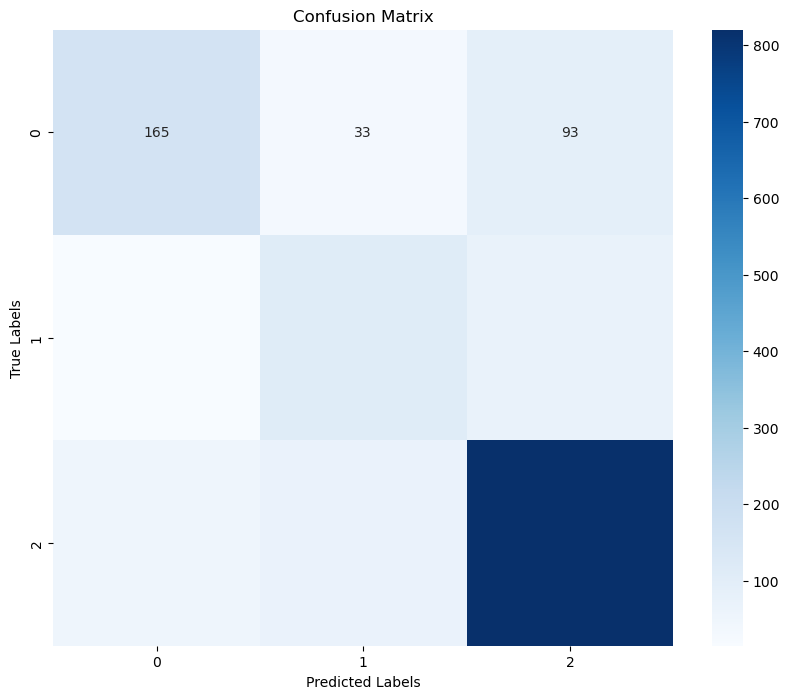

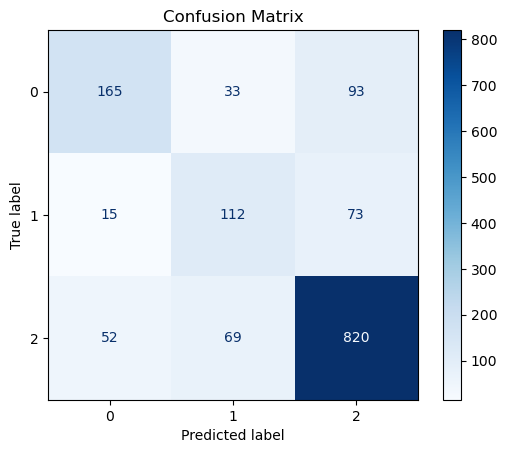

Confusion Matrix:
[[165  33  93]
 [ 15 112  73]
 [ 52  69 820]]


In [64]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder

# Assuming you have these variables:
# y_true: your actual labels
# y_pred: your predicted labels

# 1. Ensure your labels are properly encoded
# If your labels are strings, encode them
try:
    le = LabelEncoder()
    y_test_encoded = le.fit_transform(y_test)
    y_predict_encoded = le.transform(y_predict)
except:
    # If already numeric, use as is
    y_test_encoded = y_test
    y_predict_encoded = y_predict

# 2. Create the confusion matrix
cm = confusion_matrix(y_test_encoded, y_predict_encoded)

# 3. Get the unique classes
classes = np.unique(np.concatenate((y_test_encoded, y_predict_encoded)))

# 4. Create a proper visualization that shows all cells
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Alternative using sklearn's built-in display
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix')
plt.show()

# 5. Print the matrix to see all values
print("Confusion Matrix:")
print(cm)

In [65]:
# Print the classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.71      0.57      0.63       291
           1       0.52      0.56      0.54       200
           2       0.83      0.87      0.85       941

    accuracy                           0.77      1432
   macro avg       0.69      0.67      0.67      1432
weighted avg       0.76      0.77      0.76      1432

